In [123]:
import plotly.graph_objects as go
import plotly.express as px

from plotly.subplots import make_subplots

import numpy as np
import pandas as pd

import seaborn as sns

from IPython.display import display
from PIL import Image
import requests
from io import BytesIO

In [114]:
gapminder = px.data.gapminder()
tips = px.data.tips()


Plotly 인터렉티브 환경 문법

01. Hover 설정하기
02. 모드 바 편집하기
03. 버튼 생성하기
04. 슬라이더 생성하기
05. 드롭다운 메뉴 생성하기

## 01. Hover 설정 하기

사용자가 마우스 커서를 포인트 위로 이동했을때 설정한 정보가 나타나는 Hover 레이블

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;<img src = "https://wikidocs.net/images/page/186279/hover_6.png" width = "800" height = "400">

- Hover Label 종류 및 사용방법
    - Closest 방법(커서 바로 옆에 생성하기)
    - X or Y 위치(커서와 동일 축의 위치의 그래프정보 생성하기) `fig.update_layout(hovermode="x" or "y")`
    - Unified 모드 (커서와 동일 축의 위치의 그래프정보 생성하기) `fig.update_layout(hovermode="x unified" or "y unified")`
- Hover 스타일 편집하기

- Hover 텍스트 내용 편집하기
    
- 커서 따라 수평선/수직선 생성


X or Y 위치


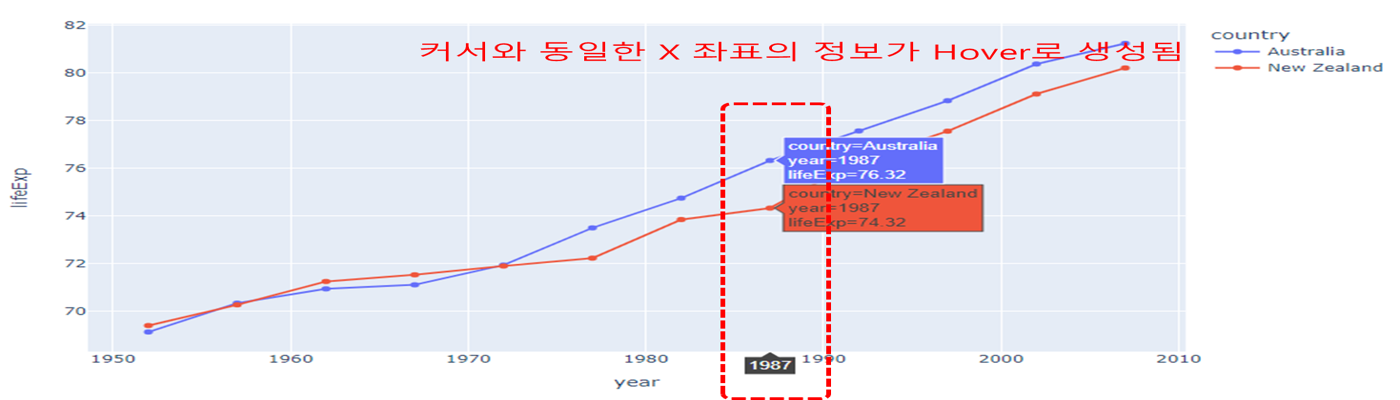

 Unified ; 커서와 동일 축의 위치의 그래프 정보 생성


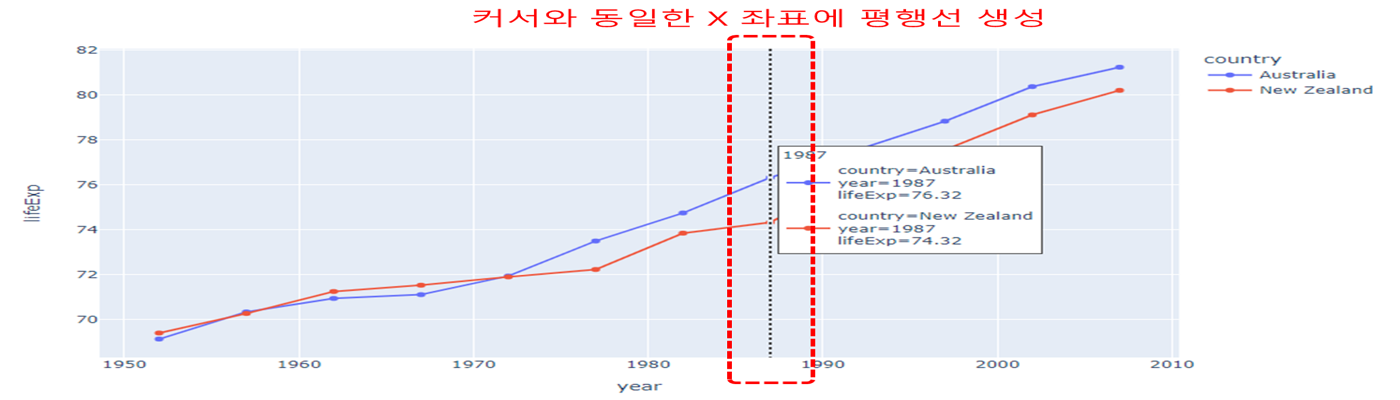

In [10]:
''' Hover Label 종류 3 가지 사용 방법

Closest 방법 - 커서 바료 옆에 생성 ; 기본 설정 값 (따로 설정을 변경 x)
X or Y 위치 - 커서와 동일 축의 위치의 그래프정보 생성 `fig.update_layout(hovermode="x" or "y")`
Unified 모드 - 커서와 동일 축의 위치의 그래프정보 생성 `fig.update_layout(hovermode="x unified" or "y unified")`

'''
df = gapminder.query("continent == 'Oceania'")

#그래프 그리기
fig = px.line(df, x="year", y="lifeExp", color="country")
fig.update_traces(mode="markers+lines")
fig.show()

print('X or Y 위치')
fig.update_layout(hovermode="x")
fig.show()
display(Image.open(BytesIO(requests.get('https://wikidocs.net/images/page/186279/hover_2.png').content)).resize((1400,400)))


print(' Unified ; 커서와 동일 축의 위치의 그래프 정보 생성')
fig.update_layout(hovermode="x unified")
fig.show()
display(Image.open(BytesIO(requests.get('https://wikidocs.net/images/page/186279/hover_3.png').content)).resize((1400,400)))


In [ ]:
'''Hover 스타일 편집하기

fig.update_layout(
        hoverlabel_bgcolor="배경색",
        hoverlabel_font_size="텍스트 사이즈",
        hoverlabel_font_color="텍스트 색",
        hoverlabel_font_family="텍스트 서체")

'''

#그래프 그리기
fig = px.line(df, x="year", y="lifeExp", color="country")
fig.update_traces(mode="markers+lines")

fig.update_layout(
        hoverlabel_bgcolor="white",
        hoverlabel_font_size=20,
        hoverlabel_font_color='red',
        hoverlabel_font_family="Rockwell")

fig.show()

In [21]:
'''Hover 텍스트 내용 편집하기

fig.update_traces(hovertemplate='HTML 스타일 편집')

'''
#그래프 그리기
fig = px.line(df, x="year", y="lifeExp", color="country", text='pop')
fig.update_traces(mode="markers+lines")

fig.update_traces(
    hovertemplate='연도: %{x} <br>' +
                  'lifeExp : %{y:.1f} <br>' +
                  'pop: %{text:,}'
)

fig.show()

In [27]:
#그래프 그리기
fig = px.line(df, x="year", y="lifeExp", color="country",text='pop')
fig.update_traces(mode="markers+lines")


# Hover 스타일 평집
fig.update_layout(hoverlabel_bgcolor="white",
                  hoverlabel_font_size=15,
                  hoverlabel_font_color='red',
                  hoverlabel_font_family="Rockwell")

# Hover 텍스트 내용 편집
fig.update_traces(hovertemplate='연도: %{x} <br>'+
                                'pop: %{text: ,} <br>'+
                                 'lifeExp : %{y: .1f}')

fig.update_layout(title_text="최종 인터렉티브 창 확인", title_x = 0.5)
fig.show()


## 02. 모드 바 편집하기

> 모드 바 구성 설명
>><img src = "https://wikidocs.net/images/page/187239/mode_2.png" width = '500' height = '60' >
>>
>> 그림파일 다운로드 : 해당 그래프를 이미지 파일로 다운   
>>영역 줌인 : 마우스 드래그를 통해 선택한 네모박스 영역을 줌인    
>>그래프를 클릭 한 채로 좌우로 움직이면 축 스케일은 고정 된 상태로 그래프가 이동   
>>마우스 드래그를 통해 네모 박스 영역 선택   
>>매우스 드래그를 통해 네모박스가 아닌 곡선의 영역 선택   
>>줌 인   
>>줌 아웃   
>>현 상태에서 그래프를 보기좋게 자동으로 다시 스케일링   
>>최초의 위치 및 스케일링 상태로 돌아가기

> 모드 바 삭제 하기

> 특정 버튼만 삭제 하기

> 그림 그리는 버튼 추가하기

> 그림파일 다운 양식 편집하기


In [33]:
'''모드 바 삭제하기

fig.show(config={'displayModeBar': False})
'''
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config={'displayModeBar': False})

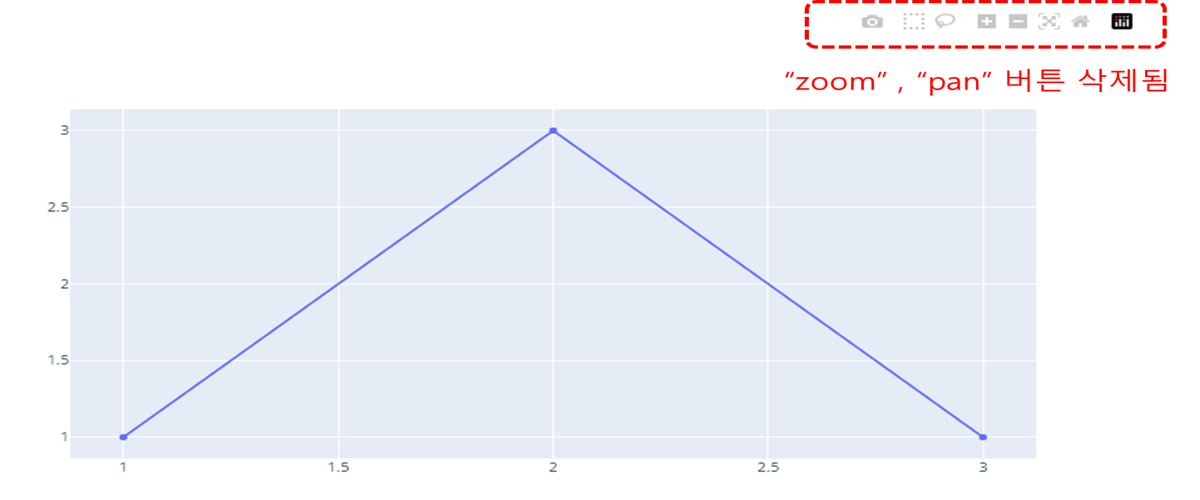

In [32]:
'''특정 버튼만 삭제

fig.show(config={'modeBarButtonsToRemove': ['zoom', 'pan']})
'''

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config={'modeBarButtonsToRemove': ['zoom', 'pan']})

display(Image.open(BytesIO(requests.get('https://wikidocs.net/images/page/187239/mode_3.png').content)).resize((1200,500)))

In [34]:
'''그림 그리는 버튼 추가하가

fig.show(config = {'modeBarButtonsToAdd': [추가하고자 하는 버튼 리스트]})

'''
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config={'modeBarButtonsToAdd':['drawline',
                                        'drawopenpath',
                                        'drawclosedpath',
                                        'drawcircle',
                                        'drawrect',
                                        'eraseshape'
                                       ]})

In [43]:
'''그림파일 다운 양식 편집기
fig.show(cconfig = {'toImageButtonOptions': {다운받을 이미지 양식 설정 }})
    
< 다운 받을 이미지 양식 설정 내역 >
    format : 'png, svg, jpeg, webp 중 다운받을 양식을 설정합니다.
    filename : 파일 이름을 설정합니다.
    height : 그림파일 높이를 설정합니다.
    width : 그림파일 너비를 설정합니다.
    scale : title/legend/axis/canvas size의 비율을 설정합니다.
    
'''
fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=[1, 2, 3],
        y=[1, 3, 1]))

fig.show(config = {
  'toImageButtonOptions': {
                            'format': 'svg', # one of png, svg, jpeg, webp
                            'filename': 'custom_image',
                            'height': 500,
                            'width': 700,
                            'scale': 1 # Multiply title/legend/axis/canvas sizes by this factor
                          }
})


## 03. 버튼 생성하기
[Plotly Chart](https://chart-studio.plotly.com/~shing2shing2/19/#/)

- 버튼 생성 방법   

>> fig.update_layout(updatemenus = dict() 형태로 아래의 정보들을 지정)   
>>>
>>> type = "buttons"   
>>>
>>> buttons = [...] 버튼의 기능 관련 정보를 각각 dict() 형태로 넣기
>>>> args = [...] method 에 맞춰 구체적인 동작 지정 (예) 그래프 변경 /  그래프 통삭제or생성 
>>>>   
>>>> label = 버튼 내부 레이블 지정      
>>>>
>>>> method= {"restyle", "relayout", "update", "animate"}
>>>>> restyle : 데이터 변경 or 그래프 타입 변경 액션   
>>>>> relayout : 그래프 레이아웃(타이틀, 축 등등..) 변경 액션   
>>>>> update : 위의 두개를 동시에 수행 할 때   
>>>>> animate : 애니메이션 플레이 스탑 버튼


>>> pad ={"r": 오른쪽, "l": 왼쪽, "t": 위쪽, "b":아랫쪽} 버튼의 pading을 지정   
>>> x = 버튼 위치의 x좌표   
>>> y = 버튼 위치의 y좌표   
>>> active = 처음 그래프 생성 시 활성화 되어있는 버튼의 index 번호   
  






-  그래프 Type이 변경되는 예제
- 그래프를 통으로 삭제 생성하는 예제
- 그래프 데이터가 변경되는 예제
- 버튼 스타일 지정하기



In [ ]:
'''그래프 타입 변경

method = 'restyle'|'update'
buttons=list([dict(args = ["변수이름", "변수속성"]])

'''
# 데이터 생성
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

#Figure 생성
fig = go.Figure()

#그래프 생성
fig.add_trace(go.Scatter(x=random_x, y=random_y, mode='lines'))

# 버튼 2개 생성
fig.update_layout(
    updatemenus=[
        dict(type="buttons",

            buttons=list([
                dict(args = ["mode", "lines"],
                     label = "Initial",
                     method = 'restyle'),
                dict(args=["mode","markers"],  # 1번 버튼 : 산포도 그래프 생성 - mode = "markers"
                    label="Scatter Plot",
                    method="restyle"),
                dict(args=["type", "bar"],  # 2번 버튼 : 바 그래프  - type = "bar"
                    label="Bar Chart",
                    method="restyle")
            ]),
        ),
    ]
)

fig.show()

In [ ]:
'''그래프를 통으로 삭제/생성하는 예제

method = "update"
args=[{"visible": [True | False]}]

'''
#Figure 생성
fig = go.Figure()

#그래프 생성
x = ['A', 'B', 'C', 'D']

# 1번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[100, 200, 500, 673]))
# 2번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[56, 123, 982, 213]))

fig.update_layout(title_text="Initial")


# 버튼 3개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1 only",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",}]),
                dict(label="Data 2 only",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",}]),
            ]),
        ),
    ]
)

fig.show()


In [ ]:
'''데이터 변경

uttons=list([dict(
                  method="restyle",
                  args=[{'y': [y1]}],   # 버튼을 한번 누르면 y = y1
                  args2=[{'y': [y2]}],  # 버튼을 한번 더 누르면 y = y2
                 )

'''
import numpy as np
#데이터 생성
x = np.linspace(-np.pi, np.pi, 10)

y1 = np.sin(x)
y2 = np.tan(x)


#Figure 생성
fig = go.Figure()

# 그래프 생성
fig.add_traces(go.Scatter(x=x, y=y1, visible=True, showlegend=True))


# 버튼 1개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Toggle Sine / Tangent",
                     method="restyle",
                     args=[{'y': [y1]}],
                     args2=[{'y': [y2]}],
                    ),

            ]),
        ),
    ]
)

fig.show()


In [58]:
'''버튼 스타일 지정하기
fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            font_color = 텍스트 색,
            font_family = 텍스트 서체,
            font_size = 텍스트 사이즈,
            bgcolor = 배경색,
            bordercolr = 테두리색,
            borderwidth = 테두리 두깨,
        )
    ]
)

'''
#Figure 생성
fig = go.Figure()

#그래프 생성
x = ['A', 'B', 'C', 'D']

# 1번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[100, 200, 500, 673]))

# 2번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[56, 123, 982, 213]))
fig.update_layout(title_text="Initial")


# 버튼 3개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1 only",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",}]),
                dict(label="Data 2 only",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",}]),
            ]),
        font_color = 'grey',
        font_size = 10 ,
        bgcolor = 'yellow',
        borderwidth = 10
        )
    ]
)

fig.show()


In [ ]:
# Figure 생성
fig = go.Figure()

# 그래프 생성
x = ['A', 'B', 'C', 'D']

# 1번 그래프
fig.add_trace(go.Bar(name='Data 1', x=x, y=[100, 200, 500, 673]))

# 2번 그래프
fig.add_trace(go.Bar(name='Data 2', x=x, y=[56, 123, 982, 213]))
fig.update_layout(title_text="Initial")

# 막대 그래프 가로 길이 동일하게 유지
fig.update_layout(barmode='group')

# y축 범위 고정
fig.update_layout(
    yaxis=dict(range=[0, 1000]))  # y축 범위를 0부터 1000까지로 고정

# 그래프 크기 고정
fig.update_layout(width=1000, height=600)  # 그래프의 가로와 세로 크기를 800x600으로 고정

# HTML 버튼 생성 및 스타일 적용
# button_style = "width: 100px; height: 30px; margin: 5px; background-color: yellow; border: 1px solid black; font-size: 10px; color: grey;"


# 버튼 3개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"},
                          # {'selector': 'button','style': button_style}
                           ]),

                dict(label="Data 1 only",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1"}]),
                dict(label="Data 2 only",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2"}]),
            ]),
            font=dict(color='grey', size=10),
            bgcolor='yellow',
            bordercolor='black',
            borderwidth=1,
            # x=0.1,  # 버튼의 x 위치 조정
            # y=1.1,  # 버튼의 y 위치 조정
            # xanchor='left',
            yanchor='top',
        )
    ],
    # margin=dict(t=50) # 그래프 상단 여백 추가
    legend=dict(
        y=0.6,  # 범례의 y 위치 조정 (버튼 아래로 이동)
        x=-0.15,# 범례의 x 위치 조정
        yanchor='bottom',  # 범례의 기준점을 아래쪽으로 설정
        font=dict(size = 10),
        itemsizing='constant',
    )
)

fig.show()

## 04. 슬라이더 생성하기

 - express 를 활용한 슬라이더 생성
 - 범위 슬라이더(range slider)생성
 - 직접 슬라이더 한 step 씩 만들기
 - 슬라이 스타일 지정하기

In [113]:
'''express 를 활용한 슬라이더 생성

animation_frame = {'컬럼이름'}

fig["layout"].pop("updatemenus") 슬라이더 옆에 재생 버튼을 삭제하기 위해 추가 이 부분은 상황에 맞게 설정

'''

# 데이터 불러오기
df = gapminder.copy()
fig = px.scatter(df, x="gdpPercap", y="lifeExp",size="pop", color="continent",
               log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90],
                animation_frame="year")

# 재생버튼 삭제
fig["layout"].pop("updatemenus") #슬라이더 옆에 재생 버튼을 삭제하기 위해 추가 이 부분은 상황에 맞게 설정
fig.show()


In [115]:
'''범위 슬라이더(range slider)생성
특정 범위를 선택할수 있게 도와주는 슬라이더

- fig.update_layout(xaxis = dic(rangeslider_visible = True)) 
'''

# 데이터 생성  
df = tips.copy()

# 그래프 생성
fig = px.scatter(df, x="total_bill", y="tip", color="sex",)

#범위 슬라이더 생성
fig.update_layout(xaxis=dict(rangeslider_visible=True))

fig.show()

In [ ]:
'''직접 슬라이더 한 step 씩 만들기

- 1단계 : 각 스텝 별 그래프 생성
- 2단계 : 각 스텝 별 슬라이더 데이터 생성

'''

# -- 1단계 : 각 스텝 별 그래프 생성
# Figure 생성 
fig = go.Figure()

# 각 스텝 별 그래프를 만들기 
## 총 30개의 scatter plot이 fig에 차레로 쌓음
for step in np.arange(0, 3, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False, # 초기에는 그래프 보이지 않음
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.02),
            y=np.sin(step * np.arange(0, 10, 0.02))))


# print(len(fig.data)) # trace 갯 수 확인
# type(fig.data)

# -- 2단계 : 각 스텝 별 슬라이더 데이터를 생성
# 스텝 별 슬라이더 데이터 리스트 생성
steps = [] # step별 조건을 dict() 형태로 담음
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

# df = pd.DataFrame(steps) # 데이터 프레임으로 자료 변환

# 최종 슬라이더 데이터 업데이트 - fig.update_layout()함수의 slikders 조건에 넣어 줌
fig.update_layout(
sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps   
)])


fig.show()


In [146]:
'''슬라이더 스타일 지정하기

fig.update_layout(
    sliders=[
        dict(
            type = "buttons",
            font_color = 텍스트 색,
            font_family = 텍스트 서체,
            font_size = 텍스트 사이즈,
            bgcolor = 배경색,
            bordercolr = 테두리색,
            borderwidth = 테두리 두깨,
        ),])

'''

# Figure 생성
fig = go.Figure()

# 각 스텝 별 그래프(Trace)를 만들기
for step in np.arange(0, 3, 0.1):
    fig.add_trace(
        go.Scatter(
            visible=False,
            line=dict(color="#00CED1", width=6),
            name="𝜈 = " + str(step),
            x=np.arange(0, 10, 0.02),
            y=np.sin(step * np.arange(0, 10, 0.02))))

# 처음 그래프 생성했을땐 index 10의 Trace 가 보이게 설정
fig.data[10].visible = True

# 스텝 별 슬라이더 데이터 리스트 생성
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="update",
        args=[{"visible": [False] * len(fig.data)},
              {"title": "Slider switched to step: " + str(i)}],  # layout attribute
    )
    step["args"][0]["visible"][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

# 최종 슬라이더 데이터 업데이트
fig.update_layout(
sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps,
    bgcolor="blue",
    font_color = "red",
    font_size= 20,
    ticklen = 3 ,
    tickcolor = "green",
)])

fig.show()


## 05. 드롭다운 메뉴 생성하기

- Dropdown 생성 방법
- 그래프 Type이 변경되는 예제
- 그래프를 통으로 삭제 생성하는 예제
- Dropdwon 스타일 지정하기

In [ ]:
'''Dropdown 생성 방법

fig.update_layout(
    updatemenus=[
        dict(
            type = "dropdown",
            direction = 메뉴가 펼쳐지는 방향
            buttons=list([dict(label="None",
                    method= 버튼을 눌렀을때 어떤 기능을 수행할지 설정,
                    args = [...]method 에 맞춰 구체적인 동작 지정,
                    args2 = [...]버튼을 2번째 눌렀을때 구체적인 동작 지정,
                    label = 버튼 텍스트)]),
            pad=버튼 패딩,
            x= 버튼위치 x좌표,
            y= 버튼위치 y좌표,
            showactive={True, False} 현재 버튼 활성화 여부 판단,
            active = 처음 그래프 생성 시 활성화 버튼 번호
        ),])

'''
# 데이터 생성
random_x = np.random.randint(1, 101, 100)
random_y = np.random.randint(1, 101, 100)

fig = go.Figure()

#그래프 생성
fig.add_trace(go.Scatter(x=random_x, y=random_y, mode='markers'))

# 버튼 2개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            
            direction="down",
            buttons=list([
                dict(args=["type", "scatter"],  # 1번 버튼
                     label="Scatter Plot",
                    method="restyle"),
                dict(args=["type", "bar"],  # 2번 버튼
                    label="Bar Chart",
                    method="restyle")
            ]),
        ),
    ]
)

fig.show()




In [158]:
'''
그래프를 통으로 삭제 생성하는 예제
'''

#Figure 생성
fig = go.Figure()

#그래프 생성
x = ['A', 'B', 'C', 'D']

# 1번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[100, 200, 500, 673]))

# 2번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[56, 123, 982, 213]))
fig.update_layout(title_text="Initial")

''''''
# 막대 그래프 가로 길이 동일하게 유지
fig.update_layout(barmode='group')

# y축 범위 고정
fig.update_layout(
    yaxis=dict(range=[0, 1000]))  # y축 범위를 0부터 1000까지로 고정

# 그래프 크기 고정
fig.update_layout(width=1200, height=600)  # 그래프의 가로와 세로 크기를 800x600으로 고정
''''''

# 버튼 3개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction = "down",

            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1 only",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",}]),
                dict(label="Data 2 only",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",}]),
            ]),
        )
    ],

    legend=dict(
        y=0.6,  # 범례의 y 위치 조정 (버튼 아래로 이동)
        x=-0.15,# 범례의 x 위치 조정
        yanchor='bottom',  # 범례의 기준점을 아래쪽으로 설정
        font=dict(size = 10),
        itemsizing='constant',
    )
)

fig.show()


In [160]:
'''Dropdown 스타일 지정하기

fig.update_layout(
    updatemenus=[
        dict(
            type = "buttons",
            font_color = 텍스트 색,
            font_family = 텍스트 서체,
            font_size = 텍스트 사이즈,
            bgcolor = 배경색,
            bordercolr = 테두리색,
            borderwidth = 테두리 두깨,
        ),])

'''

#Figure 생성
fig = go.Figure()

#그래프 생성
x = ['A', 'B', 'C', 'D']

# 1번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[100, 200, 500, 673]))

# 2번 그래프
fig.add_trace(go.Bar(name='Data 1',x=x, y=[56, 123, 982, 213]))
fig.update_layout(title_text="Initial")

''''''
# 막대 그래프 가로 길이 동일하게 유지
fig.update_layout(barmode='group')

# y축 범위 고정
fig.update_layout(
    yaxis=dict(range=[0, 1000]))  # y축 범위를 0부터 1000까지로 고정

# 그래프 크기 고정
fig.update_layout(width=1200, height=600)  # 그래프의 가로와 세로 크기를 800x600으로 고정
''''''

# 버튼 3개 생성
fig.update_layout(
    updatemenus=[
        dict(
            type="dropdown",
            direction = "down",

            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True]},
                           {"title": "Both"}]),
                dict(label="Data 1 only",
                     method="update",
                     args=[{"visible": [True, False]},
                           {"title": "Data 1",}]),
                dict(label="Data 2 only",
                     method="update",
                     args=[{"visible": [False, True]},
                           {"title": "Data 2",}]),
            ]),
        font_color = 'black',
        font_size = 10 ,
        bgcolor = 'grey',
        borderwidth = 10
        )
    ],

    legend=dict(
        y=0.6,  # 범례의 y 위치 조정 (버튼 아래로 이동)
        x=-0.15,# 범례의 x 위치 조정
        yanchor='bottom',  # 범례의 기준점을 아래쪽으로 설정
        font=dict(size = 10),
        itemsizing='constant',
    )
)

fig.show()
